<a href="https://colab.research.google.com/github/sripriyavutty/mini-project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importing Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

# 1. Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

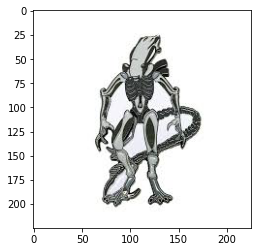

In [3]:
test_path = '/content/drive/MyDrive/Dataset/alien/0.jpg'
img = plt.imread(test_path)
plt.imshow(img)
img

# 2. Preprocess

In [4]:
DATADIR = '/content/drive/MyDrive/Dataset/'
CATEGORIES = ['alien','predator']

In [5]:
images = []
target = []
flat_data = []

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

In [6]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

2500

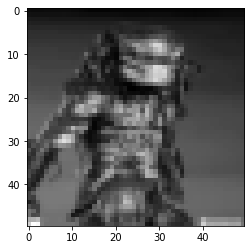

In [7]:
from skimage.color import rgb2gray
img_resize = resize(img_array,(50,50))
img_gray = rgb2gray(img_resize)
plt.imshow(img_gray,cmap='gray')
img_gray.size

In [8]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.993869,0.964209,0.956366,0.993869,0.964209,0.956366,0.991726,0.962066,0.954223,0.991660,0.961720,0.953877,0.991660,0.960288,0.952444,0.991660,0.960288,0.952444,0.990018,0.958645,0.950802,0.989451,0.958078,0.950235,0.987242,0.955869,0.948026,0.987242,0.955869,0.948026,0.987755,0.954356,0.952592,0.989804,0.954510,0.958431,0.990444,0.955150,0.959072,0
1,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,...,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0.847059,0
2,0.443137,0.513725,0.521569,0.443059,0.513647,0.521490,0.439191,0.509779,0.517622,0.439137,0.509725,0.517569,0.439137,0.509725,0.517569,0.443059,0.512484,0.521490,0.443059,0.509725,0.521490,0.450902,0.509725,0.521490,0.454824,0.509725,0.521490,0.450902,0.505804,0.517569,0.450902,0.505804,0.517569,0.450882,0.505784,0.517569,0.448582,0.503484,0.515281,0.446980,...,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0.266667,0.372549,0.400000,0
3,0.156863,0.243373,0.298275,0.156863,0.243373,0.298275,0.156863,0.243373,0.298275,0.153176,0.239451,0.294353,0.145569,0.231843,0.286745,0.145569,0.231843,0.283059,0.145569,0.231843,0.283059,0.141647,0.227922,0.282824,0.137843,0.212353,0.271176,0.149255,0.223765,0.282588,0.144980,0.219490,0.278314,0.131020,0.205529,0.264353,0.139569,0.214078,0.272902,0.151098,...,0.041725,0.043804,0.063412,0.044980,0.052824,0.072431,0.032039,0.038039,0.057647,0.022275,0.032314,0.048000,0.043451,0.061569,0.075294,0.081216,0.112588,0.124353,0.071922,0.103176,0.116902,0.049686,0.067216,0.106667,0.022196,0.037882,0.077098,0.041882,0.053529,0.085020,0.025020,0.031020,0.054667,0.013059,0.016863,0.028745,0.012235,0.015922,0.018118,0
4,0.007922,0.007922,0.007922,0.007843,0.007843,0.007843,0.003978,0.003978,0.003978,0.003922,0.003922,0.003922,0.007843,0.007843,0.007843,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.007843,0.007843,0.015425,0.003922,0.007843,0.007320,0.004444,0.007843,0.003137,0.008627,0.007843,0.019690,0.037343,0.029624,0.041486,0.079394,0.066322,0.125156,...,0.007843,0.018301,0.014379,0.005752,0.000000,0.002876,0.018824,0.018039,0.018039,0.019608,0.019608,0.019608,0.012026,0.012026,0.012026,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.007843,0.007843,0.007843,0
...,...,...,...,...,...,...,...,...,...,...,...,.

# 3. Hyperparameter Tuning 


> **Using Random Forest Classifier and GridSearchCV**

In [9]:
from sklearn.model_selection import train_test_split
x = flat_data
y = target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_Model = RandomForestClassifier()
rf_Model.fit(x_train, y_train)  
y_pred = rf_Model.predict(x_test)
print(rf_Model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [11]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
param_grid = {'n_estimators': n_estimators}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [12]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid)
rf_Grid.fit(x_train, y_train)
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')
rf_Grid.best_params_

Train Accuracy - : 1.000
Test Accuracy - : 0.699


{'n_estimators': 100}

In [13]:
rf_Model_tuned = RandomForestClassifier(n_estimators=rf_Grid.best_params_['n_estimators'])
rf_Model_tuned.fit(x_train, y_train)  
y_pred1 = rf_Model_tuned.predict(x_test)

# 4. Evaluation



> Without Hypertuning



In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
base_accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy Score for Random Forest : ",base_accuracy)

Accuracy Score for Random Forest :  0.6650717703349283


Confusion matrix:
[[73 31]
 [39 66]]


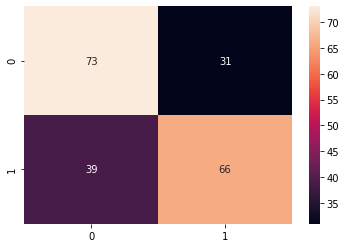

In [15]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
print("Confusion matrix:")
print(cm)
sns.heatmap(cm,annot=True)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_Model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68       104
           1       0.68      0.63      0.65       105

    accuracy                           0.67       209
   macro avg       0.67      0.67      0.66       209
weighted avg       0.67      0.67      0.66       209



> With Hypertuning

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
tuned_accuracy =  accuracy_score(y_test, y_pred1)
print ("Accuracy Score for Random Forest : ",tuned_accuracy)

Accuracy Score for Random Forest :  0.69377990430622


Confusion matrix:
[[76 28]
 [36 69]]


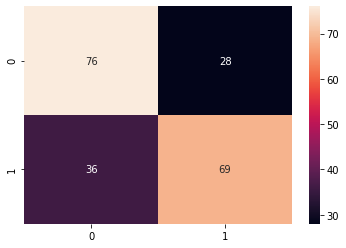

In [18]:
cm = confusion_matrix(y_test, y_pred1)
import seaborn as sns
print("Confusion matrix:")
print(cm)
sns.heatmap(cm,annot=True)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_Model_tuned.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       104
           1       0.71      0.66      0.68       105

    accuracy                           0.69       209
   macro avg       0.69      0.69      0.69       209
weighted avg       0.70      0.69      0.69       209



In [20]:
print('Improvement of {:0.2f}%.'.format( 100 * (tuned_accuracy - base_accuracy) / base_accuracy))

Improvement of 4.32%.


# 5. Prediction

In [21]:
import pickle
pickle.dump(rf_Model_tuned,open('rf_model_tuned.p','wb'))

In [22]:
model = pickle.load(open('rf_model_tuned.p','rb'))

(165, 306, 3)
PREDICTED OUTPUT: alien


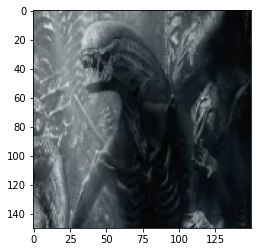

In [23]:
flat_data = []
test_path = '/content/drive/MyDrive/Dataset/alien/10.jpg'
img = plt.imread(test_path)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print('PREDICTED OUTPUT:',y_out)

(192, 263, 3)
PREDICTED OUTPUT: predator


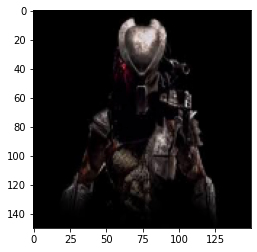

In [24]:
flat_data = []
test_path = '/content/drive/MyDrive/Dataset/predator/10.jpg'
img = plt.imread(test_path)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print('PREDICTED OUTPUT:',y_out)